In [1]:
import pandas as pd

comments_segmented = pd.read_csv("/home/kumaripinki/csvcomments.csv")
comments_segmented.head()


ID                                            Comment
0  fnztjy  I know this place. The owner is a cool guy, bu...
1  fnztjy  Now I'm 100 sure I'll come visit your country ...
2  fnztjy                                  r/HumansBeingBros
3  fnztjy                                         Wholesome.
4  fnztjy  I was planning to visit Nepal sometime in Apri...

In [2]:
comments_segmented.dropna(inplace = True)
comments_segmented.head()

ID                                            Comment
0  fnztjy  I know this place. The owner is a cool guy, bu...
1  fnztjy  Now I'm 100 sure I'll come visit your country ...
2  fnztjy                                  r/HumansBeingBros
3  fnztjy                                         Wholesome.
4  fnztjy  I was planning to visit Nepal sometime in Apri...

In [3]:
import re
for index, row in comments_segmented.iterrows():
    text = row["Comment"]
    cleaned = re.sub(r'[?|!|\'|"|#|%|$|@|*|(|)|-|_|=|+]',r' ', text)
    cleaned = cleaned.lower()
    cleaned = re.sub(r'[^\x00-\x7F]+', ' ', cleaned)
    url_pattern = r'https\S*|http\S*|www\.\S*'
    cleaned = re.sub(url_pattern, r' ', cleaned)
    cleaned = re.sub(r'\d',' ', cleaned)
    cleaned = re.sub(r'[^\w\s]', ' ', cleaned)
    cleaned = ' '.join(cleaned.split())
    comments_segmented.at[index, "Comment"] = cleaned

comments_segmented

ID                                            Comment
0     fnztjy  i know this place the owner is a cool guy but ...
1     fnztjy  now i m sure i ll come visit your country when...
2     fnztjy                                  r humansbeingbros
3     fnztjy                                          wholesome
4     fnztjy  i was planning to visit nepal sometime in apri...
...      ...                                                ...
7064  j93jhd    is this satirical even if its not its cringy af
7065  j93jhd  vaag muji bleep bloop i m a bot this comment w...
7066  j93jhd  a centuries old enslaved sanghi bhaiyya who is...
7067  j93jhd  i reply to braindead retards on life support o...
7068  j93jhd  n toilet mocking narendras shauchaylay abhiyaa...

[7068 rows x 2 columns]

In [77]:
#data preprocessing to remove gif
#starts with !marks
#these big words may be gifs!
word_lengths = []
for index, row in comments_segmented.iterrows():
    text = row["Comment"]
    words = text.split()
    word_lengths.extend([len(word) for word in words])

print("Max word length:", max(word_lengths))
print("Min word length:", min(word_lengths))
print("Average word length:", sum(word_lengths)/len(word_lengths))

Max word length: 117
Min word length: 1
Average word length: 5.4814609313229115


In [78]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/kumaripinki/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/kumaripinki/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/kumaripinki/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [79]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kumaripinki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:


stop_words = set(stopwords.words('english'))

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to NOUN if no specific tag is found

for index, row in comments_segmented.iterrows():
    text = row["Comment"]
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words and len(word) >= 3]
    lemmatizer = WordNetLemmatizer()
    pos_tags = nltk.pos_tag(filtered_tokens)
    # Lemmatization with POS tagging
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(pos_tag))
                     for token, pos_tag in pos_tags]
    processed_comment = ' '.join(lemmatized_tokens)
    comments_segmented.at[index, "Comment"] = processed_comment

comments_segmented

ID                                            Comment  \
0     fnztjy  know place owner cool guy like customer smoke ...   
1     fnztjy                     sure come visit country lovely   
2     fnztjy                                    humansbeingbros   
3     fnztjy                                          wholesome   
4     fnztjy  plan visit nepal sometime april one last stops...   
...      ...                                                ...   
7064  j93jhd                              satirical even cringy   
7065  j93jhd  vaag muji bleep bloop bot comment make anti po...   
7066  j93jhd  century old enslave sanghi bhaiyya beat black ...   
7067  j93jhd  reply braindead retard life support twice mont...   
7068  j93jhd  toilet mock narendras shauchaylay abhiyaan lma...   

      Comment_Length  Cluster  
0                  9        4  
1                  5        2  
2                  1        2  
3                  1        2  
4                 30        4  
...              ...      ...  
7064               3        2  
7065              13        1  
7066              42        4  
7067              37        4  
7068              37        4  

[6876 rows x 4 columns]

In [98]:
#after data preprocessed

#these big words may be gifs!
word_lengths = []
for index, row in comments_segmented.iterrows():
    text = row["Comment"]
    words = text.split()
    word_lengths.extend([len(word) for word in words])

print("Max word length:", max(word_lengths))
print("Min word length:", min(word_lengths))
print("Average word length:", sum(word_lengths)/len(word_lengths))

Max word length: 117
Min word length: 2
Average word length: 5.488831603149167


In [99]:
#print the comments which len>=100
for index, row in comments_segmented.iterrows():
    text = row["Comment"]
    words = text.split()
    if len(words) >= 100:
        print(text)
        print("=============================================")


update everyone want update say video report tourist police investigation currently underway meeting police officer today talk discus kind action want take guy need punish make young girl feel unsafe street city matter time day night know others unfortunately common occurrence night street thamel hope guy get identify sham action hopefully set example kind men future see yet video get lots popularity tik tok social medium platform hope much see likely find guys punish want thank everyone support video without help know serious take appreciate tourist country moment felt unsafe everyone come around show alone thank nepal viral say insist
listen audio hear say want valid reason dude walk assume girl robbery something hypocritical yes would agree wanted harm could could pick camera could much garm give free pa harrass less harm murder bad case anybody haat camera hudai hero hune haina raat paryo vandai kti paxi lagne haina sure would rect differently girls people know family popularity la

In [83]:
for index, row in comments_segmented.iterrows():
    if(len(row["Comment"]) <= 1):
        comments_segmented.drop(index, inplace=True)
file_path = '/home/kumaripinki/processsed_data.csv'

# Save the DataFrame to a CSV file at the specified location
comments_segmented.to_csv(file_path, index=False)

In [91]:
#EDA

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

comments_segmented.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6876 entries, 0 to 7068
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              6876 non-null   object
 1   Comment         6876 non-null   object
 2   Comment_Length  6876 non-null   int64 
 3   Cluster         6876 non-null   int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 499.8+ KB


In [86]:
comments_segmented.describe()

Comment_Length      Cluster
count     6876.000000  6876.000000
mean        10.484439     2.254945
std         18.239957     0.931711
min          1.000000     0.000000
25%          3.000000     2.000000
50%          5.000000     2.000000
75%         11.000000     2.000000
max        408.000000     6.000000

nepal      828
like       596
people     548
get        476
one        415
          ... 
estoo        1
basment      1
bhandeu      1
karlaya      1
lololol      1
Length: 11900, dtype: int64


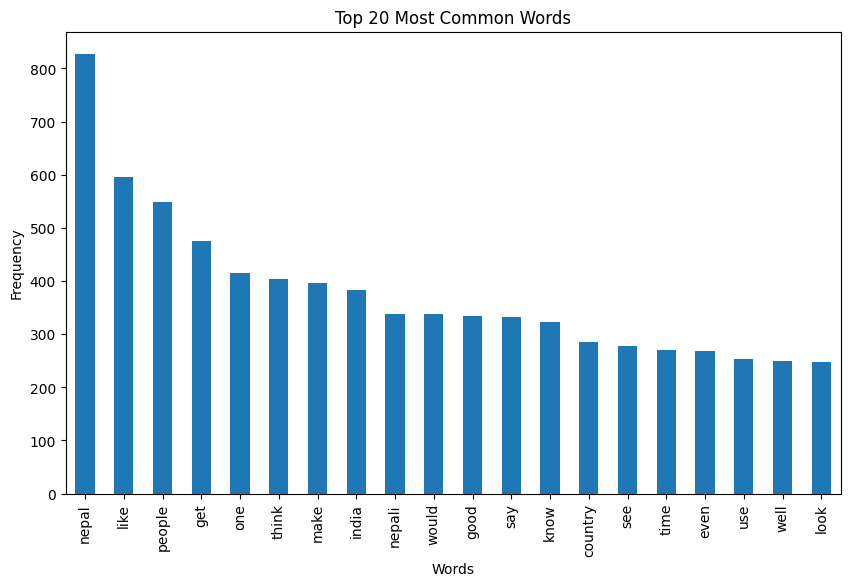

In [87]:
# Word Frequency Analysis
word_freq = pd.Series(' '.join(comments_segmented['Comment']).split()).value_counts()
print(word_freq)
word_freq[:20].plot(kind='bar', figsize=(10, 6))
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [16]:
print("Number of Distinct words in the entire corpus: ", len(word_freq))

Number of Distinct words in the entire corpus:  12050


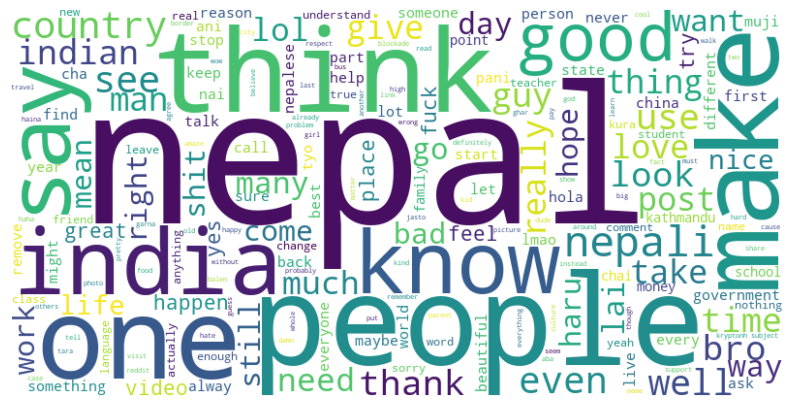

In [17]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(comments_segmented['Comment']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

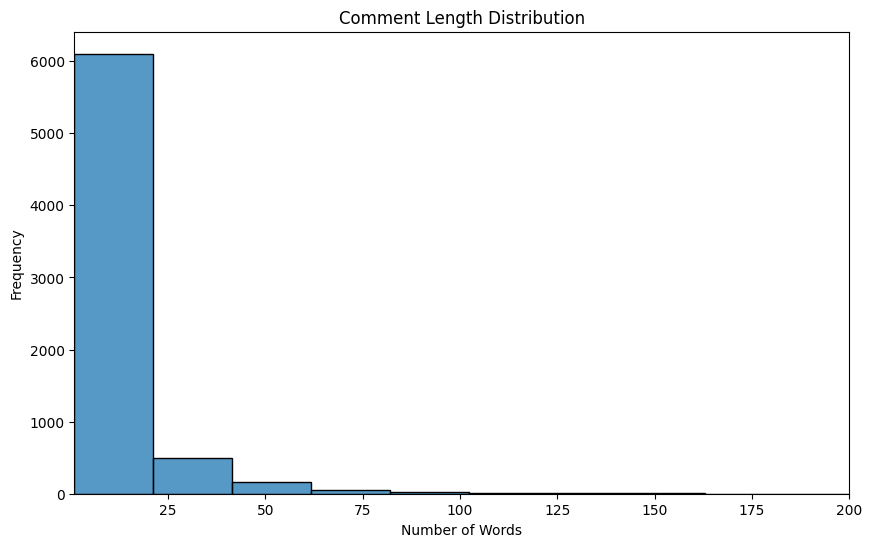

In [88]:
# Comment Length Distribution
comments_segmented['Comment_Length'] = comments_segmented['Comment'].apply(lambda x: len(x.split()))
plt.figure(figsize = (10,6))
sns.histplot(data=comments_segmented, x='Comment_Length', bins=20)
plt.title('Comment Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xlim(xmin=1, xmax = 200)
plt.show()

In [89]:
import numpy as np
print("Maximum number of words in a Comment: ", max(comments_segmented["Comment_Length"]))
print("Average number of words in a Comment: ", round(np.mean(comments_segmented["Comment_Length"]),4))

Maximum number of words in a Comment:  406
Average number of words in a Comment:  10.437


In [94]:
comments_array = []
for index, row in comments_segmented.iterrows():
    comments_array.append(row["Comment"])

count_vect = CountVectorizer()
count_matrix = count_vect.fit_transform(comments_array)
count_array = count_matrix.toarray()
print(count_vect.get_feature_names_out())
vectored_comments = pd.DataFrame(data=count_array,columns = count_vect.get_feature_names_out())
vectored_comments.head(10)

['aaaaaaaaaaa' 'aaaaaaaaaaaa' 'aaachi' ... 'zurich' 'zuv' 'zxt']


aaaaaaaaaaa  aaaaaaaaaaaa  aaachi  aaah  aaaune  aab  aaba  aabela  \
0            0             0       0     0       0    0     0       0   
1            0             0       0     0       0    0     0       0   
2            0             0       0     0       0    0     0       0   
3            0             0       0     0       0    0     0       0   
4            0             0       0     0       0    0     0       0   
5            0             0       0     0       0    0     0       0   
6            0             0       0     0       0    0     0       0   
7            0             0       0     0       0    0     0       0   
8            0             0       0     0       0    0     0       0   
9            0             0       0     0       0    0     0       0   

   aaceluoepehlyb  aadezh  ...  zhindezie  zindagi  zombie  zone  zoom  \
0               0       0  ...          0        0       0     0     0   
1               0       0  ...          0        0       0     0     0   
2               0       0  ...          0        0       0     0     0   
3               0       0  ...          0        0       0     0     0   
4               0       0  ...          0        0       0     0     0   
5               0       0  ...          0        0       0     0     0   
6               0       0  ...          0        0       0     0     0   
7               0       0  ...          0        0       0     0     0   
8               0       0  ...          0        0       0     0     0   
9               0       0  ...          0        0       0     0     0   

   zoophile  zpuwq  zurich  zuv  zxt  
0         0      0       0    0    0  
1         0      0       0    0    0  
2         0      0       0    0    0  
3         0      0       0    0    0  
4         0      0       0    0    0  
5         0      0       0    0    0  
6         0      0       0    0    0  
7         0      0       0    0    0  
8         0      0       0    0    0  
9         0      0       0    0    0  

[10 rows x 11900 columns]

In [37]:
"""
#implimented tfidf vectorizer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'comments_segmented' is a DataFrame with a column 'Comment'

# Create an empty list to store comments
comments_array = []

# Iterate through the DataFrame and append comments to the list
for index, row in comments_segmented.iterrows():
    comments_array.append(row["Comment"])

# Initialize the TF-IDF vectorizer
tfidf_vect = TfidfVectorizer()

# Fit and transform the comments using the vectorizer
tfidf_matrix = tfidf_vect.fit_transform(comments_array)
tfidf_array = tfidf_matrix.toarray()

# Create a DataFrame with TF-IDF values
vectored_comments = pd.DataFrame(data=tfidf_array, columns=tfidf_vect.get_feature_names_out())

# 'vectored_comments' now contains the TF-IDF values for each comment """


In [95]:
vectored_comments.describe()

aaaaaaaaaaa  aaaaaaaaaaaa       aaachi         aaah       aaaune  \
count  6876.000000   6876.000000  6876.000000  6876.000000  6876.000000   
mean      0.000145      0.000145     0.000145     0.000145     0.000145   
std       0.012060      0.012060     0.012060     0.012060     0.012060   
min       0.000000      0.000000     0.000000     0.000000     0.000000   
25%       0.000000      0.000000     0.000000     0.000000     0.000000   
50%       0.000000      0.000000     0.000000     0.000000     0.000000   
75%       0.000000      0.000000     0.000000     0.000000     0.000000   
max       1.000000      1.000000     1.000000     1.000000     1.000000   

               aab         aaba       aabela  aaceluoepehlyb       aadezh  \
count  6876.000000  6876.000000  6876.000000     6876.000000  6876.000000   
mean      0.000291     0.000873     0.000145        0.000145     0.000145   
std       0.024119     0.029529     0.012060        0.012060     0.012060   
min       0.000000     0.000000     0.000000        0.000000     0.000000   
25%       0.000000     0.000000     0.000000        0.000000     0.000000   
50%       0.000000     0.000000     0.000000        0.000000     0.000000   
75%       0.000000     0.000000     0.000000        0.000000     0.000000   
max       2.000000     1.000000     1.000000        1.000000     1.000000   

       ...    zhindezie      zindagi       zombie         zone         zoom  \
count  ...  6876.000000  6876.000000  6876.000000  6876.000000  6876.000000   
mean   ...     0.000145     0.000145     0.000145     0.000582     0.000582   
std    ...     0.012060     0.012060     0.012060     0.024114     0.024114   
min    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
25%    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
50%    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
75%    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
max    ...     1.000000     1.000000     1.000000     1.000000     1.000000   

          zoophile        zpuwq       zurich          zuv          zxt  
count  6876.000000  6876.000000  6876.000000  6876.000000  6876.000000  
mean      0.000145     0.000727     0.000436     0.000145     0.000145  
std       0.012060     0.039993     0.036179     0.012060     0.012060  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     3.000000     3.000000     1.000000     1.000000  

[8 rows x 11900 columns]

In [96]:
comments_array

['know place owner cool guy like customer smoke weed',
 'sure come visit country lovely',
 'humansbeingbros',
 'wholesome',
 'plan visit nepal sometime april one last stops month journey around asia end abruptly last week see something like really cement conviction global health crisis come manageable end stay strong',
 'much dollar',
 'really upvotes phone break',
 'pretty cool',
 'class act',
 'know ill eat next couple week everywhere else close',
 'fuck post like sorcery',
 'daal curry rice rupee per meal get',
 'post belong humansbeingbros community love nepal',
 'offer dhal btw',
 'pokhara lovely kill back clarify offering service want see nepal',
 'post upvoted post sub',
 'need see many people',
 'lock lol cool gesture tbf kinda wan test skint tourist see happen lol',
 'never end peace love',
 'thequarantineeffect',
 'unbelievable nice folk',
 'venmo something send money could find restaurant phone number',
 'read last bit continuously keep loving nepal',
 'accord need accord ab

In [22]:
print("Total Number of Comments after preprocessing: ", len(comments_segmented))

Total Number of Comments after preprocessing:  6876


In [97]:
# Python program to generate word vectors using Word2Vec

# importing all necessary modules
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

warnings.filterwarnings(action = 'ignore')

import gensim
from gensim.models import Word2Vec




data = [comments_array]


# Create CBOW model
model1 = gensim.models.Word2Vec(data, min_count = 1,
							vector_size = 100, window = 5)

model.save("model1.model")
loaded_model = Word2Vec.load("model1.model")

# Print results
print("Cosine similarity between 'nepal' " +
			"and 'nepali' - CBOW : ",
	model1.wv.similarity('nepal', 'nepali'))
	
"""
print("Cosine similarity between 'alice' " +
				"and 'machines' - CBOW : ",
	model1.wv.similarity('alice', 'machines')) """

# Create Skip Gram model
model2 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100,
											window = 5, sg = 1)

model.save("model2.model")
loaded_model = Word2Vec.load("model2.model")
# Print results
print("Cosine similarity between 'nepal' " +
		"and 'nepali' - Skip Gram : ",
	model2.wv.similarity('nepal', 'nepali'))
	
"""
print("Cosine similarity between 'alice' " +
			"and 'machines' - Skip Gram : ",
	model2.wv.similarity('alice', 'machines'))
"""

Cosine similarity between 'nepal' and 'nepali' - CBOW :  -0.076162204
Cosine similarity between 'nepal' and 'nepali' - Skip Gram :  -0.07323134


'\nprint("Cosine similarity between \'alice\' " +\n\t\t\t"and \'machines\' - Skip Gram : ",\n\tmodel2.wv.similarity(\'alice\', \'machines\'))\n'

In [65]:


# Create a CountVectorizer instance
count_vect = CountVectorizer()
count_matrix = count_vect.fit_transform(comments_array)

# Calculate co-occurrence matrix (using matrix multiplication)
co_occurrence_matrix = count_matrix.T @ count_matrix

print(co_occurrence_matrix.toarray())


[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 9 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


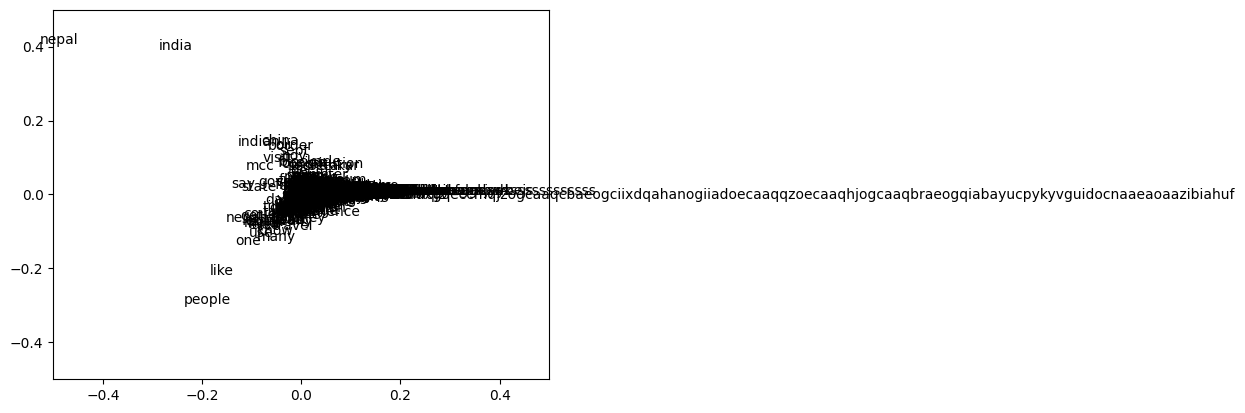

In [66]:
la = np.linalg
words = count_vect.get_feature_names_out()
arr = co_occurrence_matrix.toarray()
u,s,v = la.svd(arr, full_matrices=False)
for i in range(len(words)):
    plt.text(u[i,0], u[i,1], words[i])

plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
plt.show()

In [23]:
Comments_on_posts = {}
for index, row in comments_segmented.iterrows():
    text = row["Comment"]
    key = row["ID"]
    if(key not in Comments_on_posts):
        Comments_on_posts[key] = []
    Comments_on_posts[key].append(text)
Comments_on_posts

{'fnztjy': ['know place owner cool guy like customer smoke weed',
  'sure come visit country lovely',
  'humansbeingbros',
  'wholesome',
  'plan visit nepal sometime april one last stops month journey around asia end abruptly last week see something like really cement conviction global health crisis come manageable end stay strong',
  'much dollar',
  'really upvotes phone break',
  'pretty cool',
  'class act',
  'know ill eat next couple week everywhere else close',
  'fuck post like sorcery',
  'daal curry rice rupee per meal get',
  'post belong humansbeingbros community love nepal',
  'offer dhal btw',
  'pokhara lovely kill back clarify offering service want see nepal',
  'post upvoted post sub',
  'need see many people',
  'lock lol cool gesture tbf kinda wan test skint tourist see happen lol',
  'never end peace love',
  'thequarantineeffect',
  'unbelievable nice folk',
  'venmo something send money could find restaurant phone number',
  'read last bit continuously keep lovin

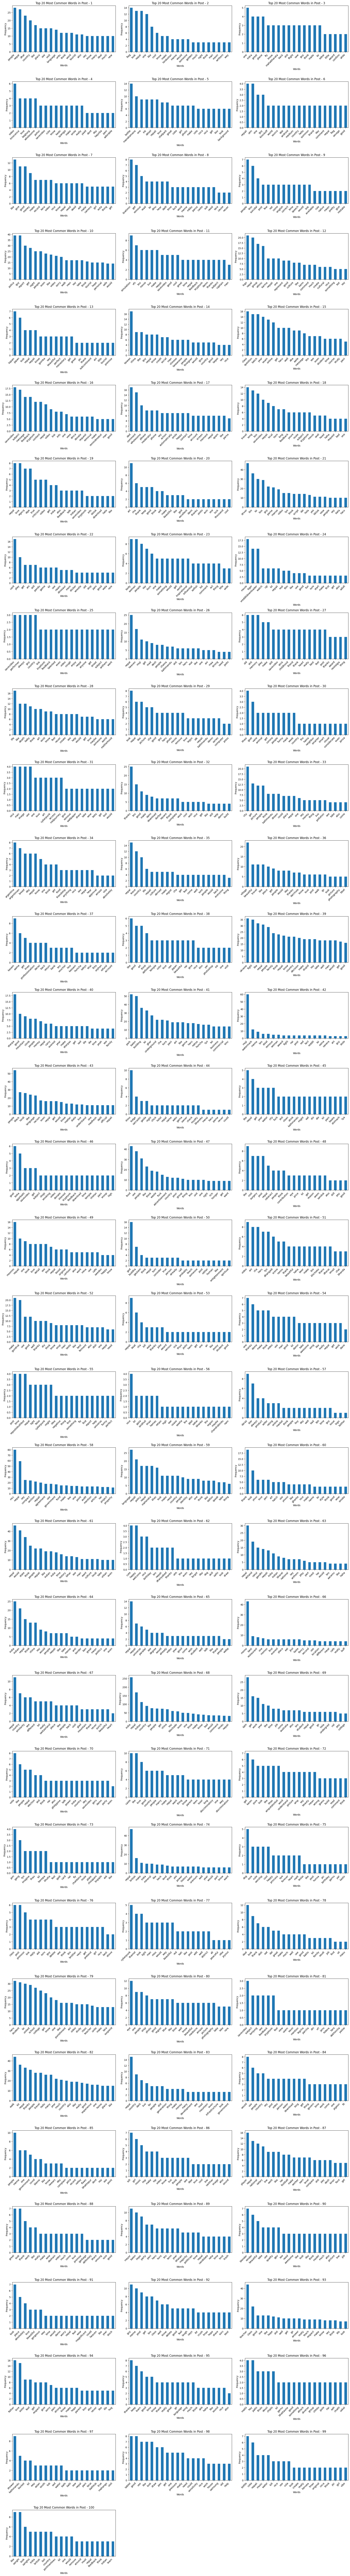

In [24]:
import matplotlib.pyplot as plt 

ind = 0
plt.figure(figsize=(20, 150))  # Create a new figure
plt.subplots_adjust(hspace=0.5, wspace=0.3)
for key, value in Comments_on_posts.items():
    word_freq = pd.Series(' '.join(value).split()).value_counts()
    plt.subplot(35, 3, ind + 1)
    word_freq[:20].plot(kind='bar')
    plt.title(f'Top 20 Most Common Words in Post - {ind+1}')  # Set title with the key
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    ind += 1

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

/home/kumaripinki/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


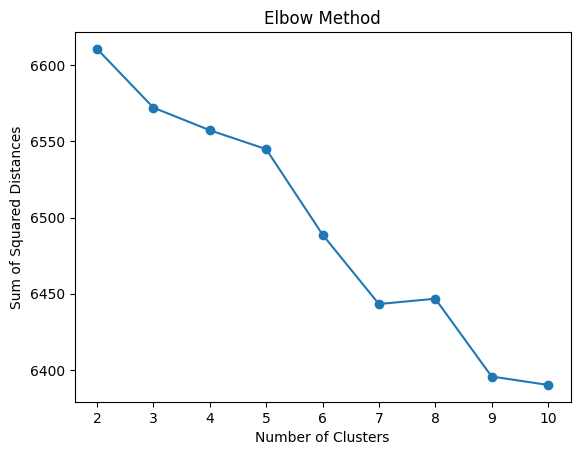

Cluster 0 - Sample Comments:
Number of comments in the cluster 99
5503                                     alright thanks
4157    something really enjoyed nepal long time thanks
6746                   teacher thanks service young man
4182                thanks explorer explore reddit post
2539                                        hehe thanks
Name: Comment, dtype: object
Cluster 1 - Sample Comments:
Number of comments in the cluster 463
5220    content comment removed account seem create so...
1391                want keep comment thread make comment
6608                                      awosome job day
6432                                       good interview
544     let good deed without expectation acclaim inte...
Name: Comment, dtype: object
Cluster 2 - Sample Comments:
Number of comments in the cluster 5164
4040    number retard sub increase everyday little dec...
3885    lol image channel use show teenage mutant ninj...
2752    long ago picture take comparison shot place ye.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you have a DataFrame called 'comments_segmented' with processed comments

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(comments_segmented['Comment'])

# Determine the optimal number of clusters using the Elbow Method
# Find the optimal number of clusters by plotting the sum of squared distances (inertia) for different k values
inertia_values = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

# Based on the Elbow Method, choose the optimal number of clusters (elbow point)

# Perform K-means clustering with the chosen number of clusters
num_clusters = 7  # Choose the optimal number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the DataFrame
comments_segmented['Cluster'] = clusters

# Print some sample comments from each cluster
for cluster_id in range(num_clusters):
    cluster_comments = comments_segmented[comments_segmented['Cluster'] == cluster_id]['Comment']
    print(f"Cluster {cluster_id} - Sample Comments:")
    print("Number of comments in the cluster", len(cluster_comments))
    print(cluster_comments.sample(5))
    print("=" * 50)

# Calculate Silhouette Score to evaluate the quality of clustering
silhouette_avg = silhouette_score(X, clusters)
print(f"Average Silhouette Score: {silhouette_avg}")
